# Приоритизация гипотез и анализ A/B теста для интернет-магазина

# Часть 1. Приоритизация гипотез.

**Цели и задачи:**

 - применить фреймворк ICE для приоритизации гипотез, отсортировать их по убыванию приоритета;
 - применить фреймворк RICE для приоритизации гипотез, отсортировать их по убыванию приоритета;
 - указать, как изменилась приоритизация гипотез при применении RICE вместо ICE, объяснить, почему так произошло.

Основной задачей проекта также является оценка результатов А/В теста, который должен показать, приведет ли предложенная гипотеза к увеличению выручки интернет- магазина в группе В. Для анализа результатов А/В теста необходимы следующие шаги:
    
 - для оценки изменения результатов эксперимента на каждый день тестирования необходимо изучить графики таких кумулятивныхданных данных, как: выручки, среднего чека и конверсии; 
 - для выявления аномальных данных необходимо изучение точечного графика количества заказов по пользователям и по стоимости заказов, а также определение 95-ого и 99-ого перцентилей для определения границы аномадтных значений;
 - для того, чтобы сделать выводы о том, произоли ли изменения между тестируемыми группами необходимо провести оценку статистической значимости в среднем чеке и в среднем количестве заказов на посетителя между группами.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns

**Предобработка**

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Фрейм с данными о гипотезах содержит 9 строк и 5 столбцов:
 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence —  уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.
 Пропусков нет.

Проверка на наличие явных дубликатов:

In [4]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [5]:
for df in [hypothesis]:
    a = df.duplicated().sum()
    if a > 0:
        print(f'Количество дубликатов в таблице: {a}')
    else:
        print(f'В таблице  {get_df_name(df)} нет дубликатов')

В таблице  hypothesis нет дубликатов


Приведем названия столбцов к удобному для работы стилю:

In [6]:
def processing(df):
    if df.duplicated().sum() > 0:
        df.drop_duplicates(inplace=True)
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','_')
    return df.info()

In [7]:
processing(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Все столбцы имеют корректный тип данных.

In [8]:
hypothesis['hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Неявных дубликатов в формулировках гипотез нет.

В ходе предобработки данных:
- выввели общую информацию о данных фрейма 'hypothesis', содержащего 9 строк и 5 столбцов;
- все столбцы имеют корректный тип данных;
- пропусков в данных не обнаружено;
- явных и неявных дубликатов не обанружено;
- привели названия столбцов к более удобному для работы стилю.

## Приоритизация гипотез

Гипотезы приоритизируют, чтобы сократить расходы на эксперименты и запускать тестирование только наиболее перспективных идей.

**Применение метода ICE для приоритизации гипотез**

In [9]:
pd.options.display.max_colwidth = 110
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Топ-3 лидирующие гипотезы с наивысшими баллами в результате приоритизации методом ICE: 
 - 'Запустить акцию, дающую скидку на товар в день рождения' - 16.2, 
 - 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей' - 13.33, 
 - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' - 11.2.

Самый низкий балл у гипотезы: 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей' - 1 балл.

**Применение метода RICE для приоритизации гипотез**

In [10]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Топ-4 лидирующие гипотезы с наивысшими баллами в результате приоритизации методом RICE: 
 - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'' - 112, 
 - 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа' - 56, 
 - 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей' - 40,
 - 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию' - 40.

Самый низкий балл, как и в предыдущем случае, у гипотезы: 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей' - 3 баллла.

Для наглядности выведем все столбцы полученной таблицы:

In [11]:
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Тот факт, что методы ICE и RICE выдали разные результаты можно объяснить тем, что метод RICE учитывает дополнительный фактор, а именно: 'Reach'- охват пользователей. Таким образом, гипотезы с высоким значением Reach, в ходе приоритизации гипотез методом RICE поднялись наверх. А лидирующая гипотеза в случае с методом ICE, опустилась вследствие очень низкого показателя охвата пользователей. По результатам двух методов приоритизации гепотез можно сделать вывод, что в первую очередь следует тестировать гипотезу 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок', т.к. она имеет оптимальные значения всех пораметров.

# Часть 2. Анализ A/B-теста

**Цели и задачи:**

 - построить график кумулятивной выручки по группам, сделать выводы и предположения;
 - построить график кумулятивного среднего чека по группам, сделать выводы и предположения;
 - построить график относительного изменения кумулятивного среднего чека группы B к группе A, сделать выводы и предположения;
 - построить график кумулятивного среднего количества заказов на посетителя по группам, сделать выводы и предположения;
 - построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A, сделать выводы и предположения.
 - построить точечный график количества заказов по пользователям, сделать выводы и предположения;
 - посчитать 95-й и 99-й перцентили количества заказов на пользователя, выбрать границу для определения аномальных пользователей;
 - построить точечный график стоимостей заказов, сделать выводы и предположения;
 - посчитать 95-й и 99-й перцентили стоимости заказов, выбрать границу для определения аномальных заказов;
 - посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным, сделать выводы и предположения;
 - посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным, сделать выводы и предположения;
 - посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным, сделать выводы и предположения;
 - посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным, сделать выводы и предположения;
 - принять решение по результатам теста и объяснить его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Предобработка**

In [12]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [13]:
processing(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Фрейм с данными о заказах содержит 1197 строк и 5 столбцов:

 - transactionid — идентификатор заказа;
 - visitorid — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.
 - Пропусков нет.

In [14]:
processing(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Фрейм с данными о пользователях содержит 62 строки и 3 столбца:

 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста;
 - Пропусков нет.

In [15]:
orders = orders.rename(columns={'transactionid':'transaction_id', 'visitorid':'visitor_id'})

Проверка на наличие явных дубликатов:

In [16]:
for df in [orders, visitors]:
    a = df.duplicated().sum()
    if a > 0:
        print(f'Количество дубликатов в таблице: {a}')
    else:
        print(f'В таблице  {get_df_name(df)} нет дубликатов')

В таблице  df нет дубликатов
В таблице  df нет дубликатов


In [17]:
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')

В ходе предобработки данных:
- выввели общую информацию о данных: фрейм с данными о заказах содержит 1197 строк и 5 столбцов, фрейм с данными о пользователях содержит 62 строки и 3 столбца;
- таблицы с данными о заказах и пользователях имели некорректный тип данных в столбцах с датами, привели к необходимому для работы типу;
- пропусков в данных не обнаружено;
- явных дубликатов не обанружено;
- привели названия столбцов к более удобному для работы стилю.

## Анализ A/B-теста

Чтобы исключить проблему подсматривания, необходимо анализировать графики кумулятивных метрик.

**Кумулятивная выручка по дням и группам A/B-тестирования**

In [18]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


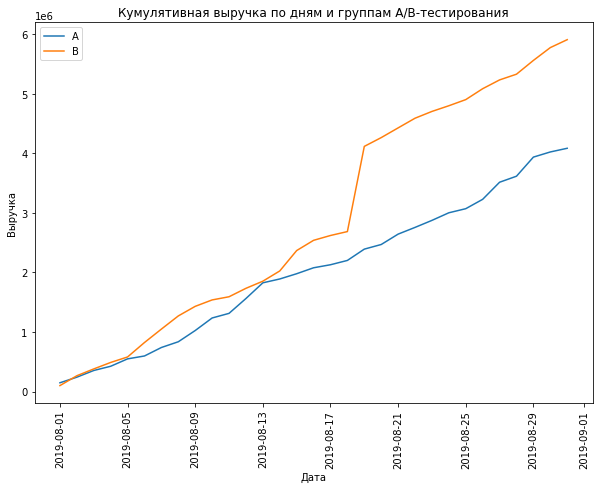

In [19]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(10,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title("Кумулятивная выручка по дням и группам A/B-тестирования")
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend();
plt.xticks(rotation=90);

Выручка почти равномерно увеличивается в течение всего теста. По графику видно, что группа B опережает по выручке группу А. Также, заметен скачок в выручке для группы В с 18.08.2019 числа. Это может быть обусловлено наличием аномально высоких значений, увеличении количества заказов и или их стоимости. 

**Кумулятивный средний чек по группам**

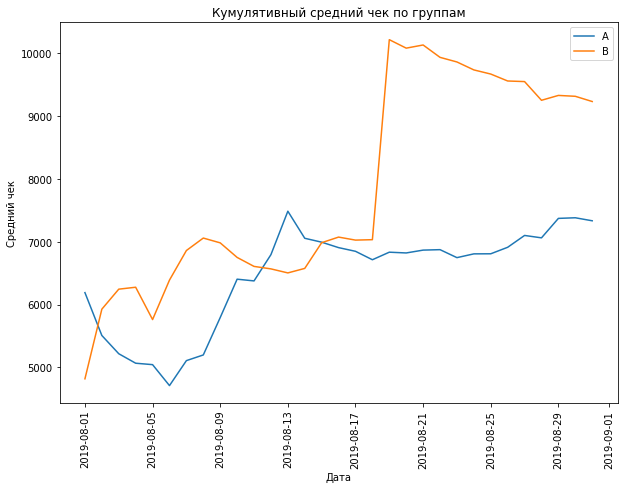

In [20]:
plt.figure(figsize=(10,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title("Кумулятивный средний чек по группам")
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.xticks(rotation=90);

По графику видно, что начальный период средние чеки группы А и В не стабильны. Также заметно влияние аномально высокого значения на средний чек для группы В. Вследствие этого заметен спад среднего чека группы В. К концу периода средний чек группы А более стабилен.

**Относительное изменение кумулятивного среднего чека группы B к группе A**

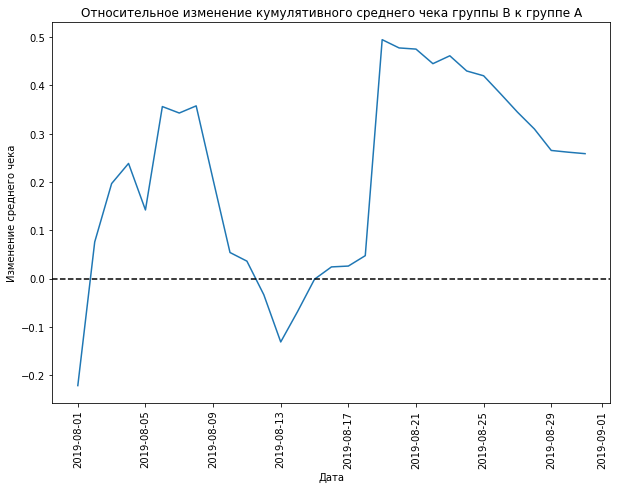

In [21]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Относительное изменение кумулятивного среднего чека группы B к группе A")
plt.xlabel('Дата')
plt.ylabel('Изменение среднего чека')
plt.xticks(rotation=90);

В нескольких точках график сильно скачет. Группа В совершает резкий скачек в показателе среднего чека, во второй половине теста, относительно группы А. Но здесь не хватает данных, чтобы утверждать, что метрика стабилизировалась для группы В.

**Кумулятивное среднее количество заказов на посетителя по группам**

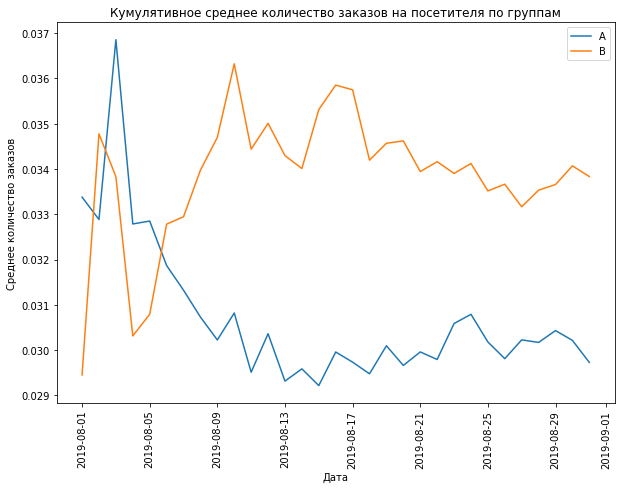

In [22]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(10,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title("Кумулятивное среднее количество заказов на посетителя по группам")
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.xticks(rotation=90);
plt.legend();

В начальный период значения среднего значения заказов на поситетеля сильно скакали, конверсия для группы А была выше. Далее, значения для обеих групп стабилизировались, и картина поменялась. Конверсия пользователей для группы В стабильно выше.

**Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A**

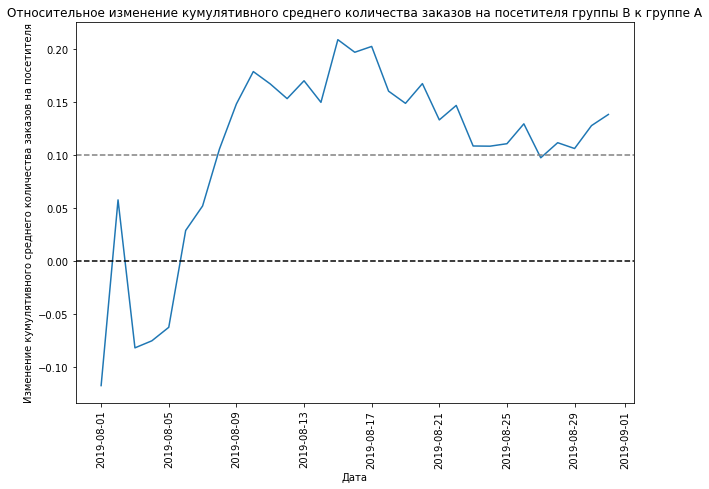

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title("Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.xlabel('Дата')
plt.ylabel('Изменение кумулятивного среднего количества заказов на посетителя')
plt.xticks(rotation=90);

По графику виден сначала стремительный рост среднего количества заказов напосетителя в группе В, затем резкое падение. Затем, снова стремительный рост и стабилизация на уровне около 10 % прироста относительно группы А.

**Точечный график количества заказов по пользователям**

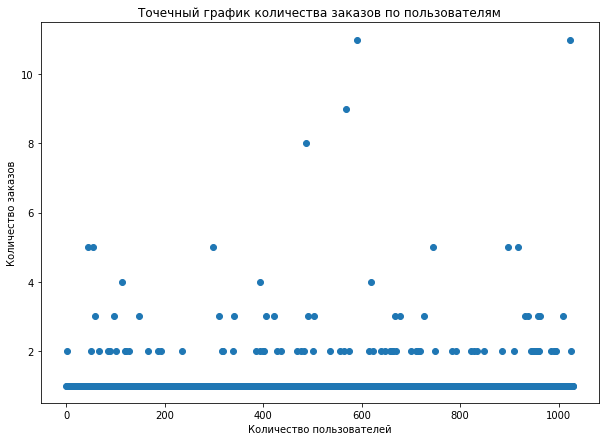

In [24]:
ordersByUsers = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))
ordersByUsers.columns = ['visitor_id', 'transaction_id']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10,7))
plt.scatter(x_values, ordersByUsers['transaction_id'])
plt.title("Точечный график количества заказов по пользователям")
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов');

Подавляющее большинство пользователей делают один заказ, еще меньше пользователей делают 2 и 3 заказа, но все же, кажется, их доля существенна. Совсем редко делают больше трех заказов. Далее проверим, является ли это аномалией.

**Определение аномальных пользователей**

Чтобы определить границы для выявления аномальных пользователей, определим 95-й и 99-й перцентили количества заказов на пользователя

In [25]:
np.percentile(ordersByUsers['transaction_id'], [ 95, 99])

array([2., 4.])

Не более 5 % пользователей совершали больше 2 заказов, и не более 1 % пользователей совершали больше 4 заказов. Разумно выбрать 3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

**Точечный график стоимостей заказов**

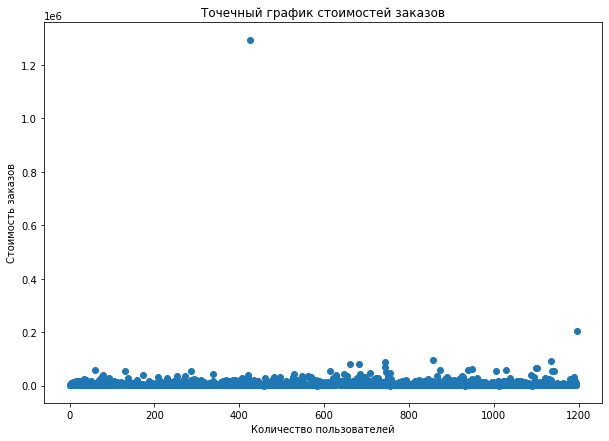

In [26]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10,7))
plt.scatter(x_values, orders['revenue'])
plt.title("Точечный график стоимостей заказов")
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов');

На графике можно заметить аномально большие стоимости заказов, от 200000. Из за них по графику очень сложно что-то понять. Установим границу по стоимости заказа в 100000 для более наглядной картины.

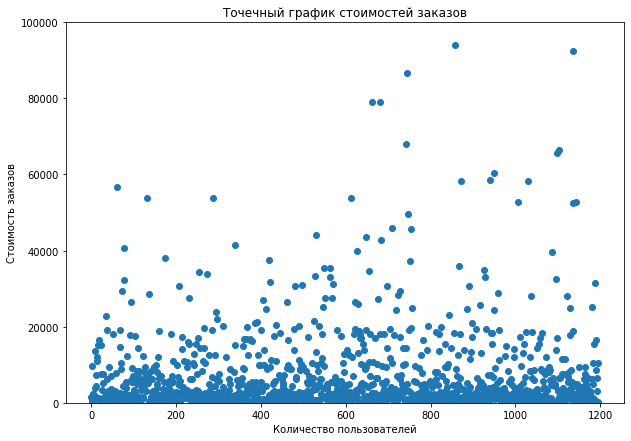

In [27]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10,7))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000)
plt.title("Точечный график стоимостей заказов")
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов');

Здесь уже видно, что заказы, дороже 20000 все реже и реже. Но по графику сложно установить аномальность значений.

**Определение аномальных заказов**

Чтобы определить границы для выявления аномальных заказов, определим 95-й и 99-й перцентили стоимости заказов.

In [28]:
np.percentile(orders['revenue'], [ 95, 99])

array([28000. , 58233.2])

Не более, чем у 5 % заказов чек дороже 28000, и не более, чем у 1 % заказов - 58233.2.

**Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

In [29]:
ordersByUsersG = orders.groupby(['visitor_id', 'group'], as_index=False).agg({'transaction_id': 'nunique'})
ordersByUsersG.columns = ['visitor_id','group','transaction_id']

In [30]:
ordersByUsersA = ordersByUsersG.query('group == "A"').reset_index(drop=True)
ordersByUsersB = ordersByUsersG.query('group == "B"').reset_index(drop=True)

In [31]:
sampleA = pd.concat([ordersByUsersA['transaction_id'],
                     pd.Series(0, index=np.arange(cumulativeDataA['visitors'].sum() - len(ordersByUsersA['transaction_id'])),
                               name='transaction_id')],axis=0)
sampleB = pd.concat([ordersByUsersB['transaction_id'],
                     pd.Series(0, index=np.arange(cumulativeDataB['visitors'].sum() - len(ordersByUsersB['transaction_id'])),
                               name='transaction_id')],axis=0)

Для проверки сформулируем гипотезы:
 - Н(0): Различий между группами в среднем количестве заказов по «сырым» данным нет;
 - Н(1): Различия между группами в среднем количестве заказов по «сырым» данным статистически значимы;

In [32]:
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('p-значение: {:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-значение: 0.015
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост конверсии группы B: 0.144


Таким образом, отвергнув нулевую гипотезу, мы можем предположить, что различия между группами в среднем количестве заказов по «сырым» статистически значимы. Относительный прирост среднего количества заказов группы В по отношению к группе А составляет 14.4 %.

**Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным**

Для проверки сформулируем гипотезы:

 - Н(0): Различий между группами в среднем чеке заказа по «сырым» данным нет;
 - Н(1): Различия между группами в среднем чеке заказа по «сырым» данным статистически значимы;

In [33]:
alpha = 0.05
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии в среднем чеке сделать нельзя')
    

print('Относительный прирост в среднем чеке группы B {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение: 0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии в среднем чеке сделать нельзя
Относительный прирост в среднем чеке группы B 0.26


По «сырым» данным различий в среднем числе заказов групп A и B нет.  Однако относительный прирост группы B равен 26 %.

**Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**

Выше мы посчитали 95-ый и 99-ый перцентили количества и стоимости заказов. Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 30 000 рублей.

In [34]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction_id'] > 3]['visitor_id'],
        ordersByUsersB[ordersByUsersB['transaction_id'] > 3]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.shape[0]

57

Всего 57 аномальных пользователей. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.

In [35]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['transaction_id'],
     pd.Series(0, index=np.arange(cumulativeDataA['visitors'].sum() - len(ordersByUsersA['transaction_id'])),
               name='transaction_id')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['transaction_id'],
     pd.Series(0, index=np.arange(cumulativeDataB['visitors'].sum() - len(ordersByUsersB['transaction_id'])),
               name='transaction_id')],axis=0)

Для проверки сформулируем гипотезы:
 - Н(0): Различий между группами в среднем количестве заказов по «очищенным» данным нет;
 - Н(1): Различия между группами в среднем количестве заказов по «очищенным» данным статистически значимы;

In [36]:
alpha = 0.05
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('p-значение: {:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение: 0.016
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост конверсии группы B: 0.153


Таким образом, по очещенным данным тест также показал, что  различия между группами в среднем количестве заказов статистически значимы. В данном случае значение p-value у величилось, как и прирост среднего количества заказов на покупателя для группы В по отношению к группе А. (было 14.4 %, стало 15.3 %).

**Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным**

Для проверки сформулируем гипотезы:

 - Н(0): Различий между группами в среднем чеке заказа по «очищенным» данным нет;
 - Н(1): Различия между группами в среднем чеке заказа по «очищенным» данным статистически значимы;

In [37]:
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии в среднем чеке сделать нельзя')
    
print('Относительный прирост в среднем чеке группы B {:.2f}'.format(orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()-1))

p-значение: 0.958
Не получилось отвергнуть нулевую гипотезу, вывод о различии в среднем чеке сделать нельзя
Относительный прирост в среднем чеке группы B -0.02


По очищенным данным тест, также как и по сырым данным, показал, что статистическихъ значимых различий между группами в среднем чеке заказа нет. Однако, относительный прирост изменился. На сырых данных он показал превосходство группы В на 26 %. В данном случае группа А опережает группу В в среднем чеке на 2 %.

**Выводы по проведенному тесту:**

 - есть статистически значимые различия в среднем количестве заказов на посетителя между группами по «сырым»  и по «очищенным» данным;
 - нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
 - график различия среднего количества заказов между группами показывает стремительный рост данного показателя в группе В, и стабилизация на уровне около 10 % прироста относительно группы А;
 - график различия среднего чека говорит о том, что группа В к концу теста превосходит группу А в данном показателе почти на 20%;

Исходя из обнаруженных фактов, тест стоит продолжить. Несмотря на то, что мы установили, что группа В превосходит группу А в конверсии на 15.3 %, и это превосходство статистически значимо, различий между средними чеками групп мы не обнаружили. А при оценке «очищенных» данных обнаружилось превосходство группы А над группой В на 2 %. Также, график различия среднего чека говорит, о том, что данных слишком мало, чтобы сделать четкий вывод о стабилизации данной метрики у группы В.

Судя по графику относительного изменения среднего чека, тест стоит продолжать, как минимум еще 4 дня, и там уже делать окончательный вывод относительно выигрша группы В.

**Общие выводы:**

Топ-3 лидирующие гипотезы с наивысшими баллами в результате приоритизации методом ICE:

 - 'Запустить акцию, дающую скидку на товар в день рождения' - 16.2,
 - 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей' - 13.33,
 - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' - 11.2.

Топ-4 лидирующие гипотезы с наивысшими баллами в результате приоритизации методом RICE: 
 - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'' - 112, 
 - 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа' - 56, 
 - 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей' - 40,
 - 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию' - 40.

Тот факт, что методы ICE и RICE выдали разные результаты можно объяснить тем, что метод RICE учитывает дополнительный фактор, а именно: 'Reach'- охват пользователей. Таким образом, гипотезы с высоким значением Reach, в ходе приоритизации гипотез методом RICE поднялись наверх. А лидирующая гипотеза в случае с методом ICE, опустилась вследствие очень низкого показателя охвата пользователей. По результатам двух методов приоритизации гепотез можно сделать вывод, что в первую очередь следует тестировать гипотезу 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок', т.к. она имеет оптимальные значения всех пораметров.

Исходя из обнаруженных фактов, тест стоит продолжить. Несмотря на то, что мы установили, что группа В превосходит группу А в конверсии на 15.3 %, и это превосходство статистически значимо, различий между средними чеками групп мы не обнаружили. А при оценке «очищенных» данных обнаружилось превосходство группы А над группой В на 2 %. Также, график различия среднего чека говорит, о том, что данных слишком мало, чтобы сделать четкий вывод о стабилизации данной метрики у группы В.